In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x, y_true, y_pred, file_path, clt_num, cost, rows=1, columns=1, size=(6, 4)):
    fig, ax = plt.subplots(rows, columns, figsize=size)
    ax.plot(x, y_true, 'rx', label='average score')
    ax.plot(x, y_pred, 'b-', label='curve fitting')
    ax.set_xlim([0, max(x)+1])
    ax.set_ylim([0, max(y_true)+0.2])
    ax.legend(fontsize=14)
    ax.set_title("cluster {0}: cost {1}".format(clt_num, round(cost, 2)))
    fig.savefig(file_path, dpi=100)
    plt.show()
    
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/15attempts/indices/index12.pickle")
train_idx = train_idx[9] #2, 8

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores[:300, :]/1e+4
attempts15 = np.arange(15)+1
attempts300 = np.arange(300)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(300)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data
    
dcp.make_folders("../../Figs/curve_fitting/")

Training data set: (300, 22832)
../../Figs/curve_fitting/ already present - Skipping pickling.


../../Figs/curve_fitting/step/single/ already present - Skipping pickling.
 - Curve Fitting Parameters: [ 2.69785208]
 - Curve Fitting Cost: 50.86484949814728



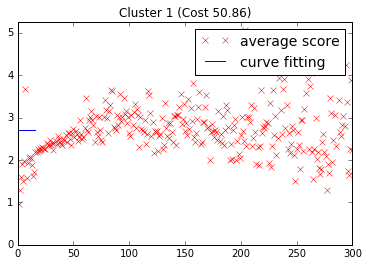

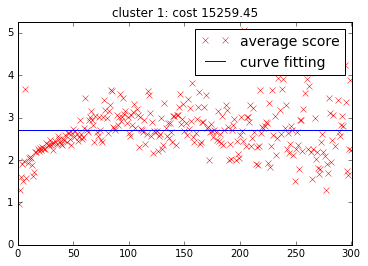

In [5]:
def step_curve(x, w0):
    return  [w0]*len(x)

def step_least(w, x, y):
    return step_curve(x, w[0]) - y

seed = [1]
dcp.make_folders("../../Figs/curve_fitting/step/single/")

step_opt, step_cost = cv.curve_Fitting(
        step_least, step_curve, 
        attempts300, eval("avg{0}".format(1)), seed, 
        "../../Figs/curve_fitting/step/single/sample{0}".format(1), clt_num = 1)

## validation
y_fit_true = step_curve(attempts300, step_opt)

step_cost_valid = cv.cost_Function(eval("avg{0}".format(1)), y_fit_true) # get cost for all data

disp_Data(attempts300, eval("avg{0}".format(1)), y_fit_true, 
          file_path="../../Figs/curve_fitting/step/single/valid{0}".format(1), 
          clt_num=1, cost = step_cost_valid)

In [ ]:
dcp.make_folders("../../Figs/curve_fitting/step/single/")

seed = [1, 1]
for i in range(nClt):
    print("cluster {0}:".format(i+1))
    ## train
    exp2_opt, exp2_cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts15, eval("avg{0}".format(i+1))[:15], seed, 
        "../../Figs/curve_fitting/step/single/sample{0}".format(i+1), clt_num = i+1)
    
    true_opt, true_cost = cv.curve_Fitting(
        cv.exponential_least2, cv.exponential_curve2, 
        attempts300, eval("avg{0}".format(i+1)), seed, 
        "../../Figs/curve_fitting/step/single/dummy", clt_num = i+1)
    
    ## validation
    y_fit_valid = cv.exponential_curve2(attempts300, exp2_opt[0], exp2_opt[1])
    y_fit_true = cv.exponential_curve2(attempts300, true_opt[0], true_opt[1])
    
    exp2_cost_valid = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_valid) # get cost for all data
    exp2_cost_true = cv.cost_Function(eval("avg{0}".format(i+1)), y_fit_true) # get cost for all data
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_valid, 
              file_path="../../Figs/curve_fitting/step/single/valid{0}".format(i+1), 
              clt_num=i+1, cost = exp2_cost_valid)
    
    disp_Data(attempts300, eval("avg{0}".format(i+1)), y_fit_true, 
          file_path="../../Figs/curve_fitting/step/single/true{0}".format(i+1), 
          clt_num=i+1, cost = exp2_cost_true)